In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [35]:
dataframe_cardio = pd.read_csv('dataset_cardio.csv')
dataframe_cardio.head(15)

,edad,género,dolor de pecho,presión sanguínea,colesterol,nivel de glucosa,ECG,Pulso,Angina,depresión ST,curva ST,Vesiculas,Defectos,Resultado
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [40]:
#Transformamos el dataframe a Numpy
datos_cardio = dataframe_cardio.to_numpy()

#Y ahora hacemos que solo sean 2 valores, 0 y 1:
for counter in range(0,datos_cardio.shape[0]):
    if(datos_cardio[counter,13] > 0):
        datos_cardio[counter,13] = 1
print(datos_cardio)


[[63.  1.  1. ...  0.  6.  0.]
 [67.  1.  4. ...  3.  3.  1.]
 [67.  1.  4. ...  2.  7.  1.]
 ...
 [68.  1.  4. ...  2.  7.  1.]
 [57.  1.  4. ...  1.  7.  1.]
 [57.  0.  2. ...  1.  3.  1.]]


In [5]:
pacientes_sanos = datos_cardio[np.where(datos_cardio[:,13] == 0)]
pacientes_enfermos = datos_cardio[np.where(datos_cardio[:,13] == 1)]
print("Pacientes sanos:")
print(pacientes_sanos)

print("Pacientes enfermos:")
print(pacientes_enfermos)

Pacientes sanos:
[[63.  1.  1. ...  0.  6.  0.]
 [37.  1.  3. ...  0.  3.  0.]
 [41.  0.  2. ...  0.  3.  0.]
 ...
 [56.  1.  2. ...  0.  3.  0.]
 [55.  0.  2. ...  0.  3.  0.]
 [41.  1.  2. ...  0.  3.  0.]]
Pacientes enfermos:
[[67.  1.  4. ...  3.  3.  1.]
 [67.  1.  4. ...  2.  7.  1.]
 [62.  0.  4. ...  2.  3.  1.]
 ...
 [68.  1.  4. ...  2.  7.  1.]
 [57.  1.  4. ...  1.  7.  1.]
 [57.  0.  2. ...  1.  3.  1.]]


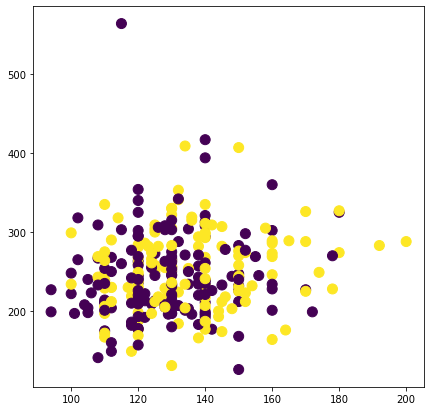

In [7]:
# Plot...
plt.figure(figsize=(7,7))
plt.scatter(datos_cardio[:,3], datos_cardio[:,4], c=datos_cardio[:,13], s=100)

Plotteando: presión sanguínea(X) vs colesterol(Y)


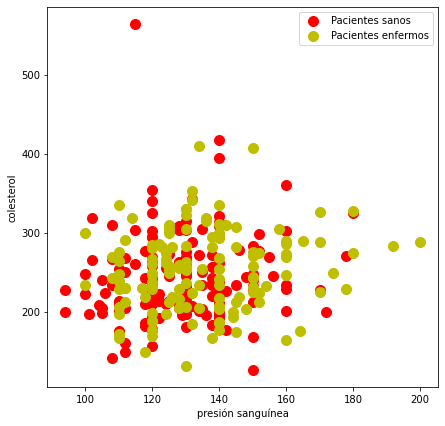

In [20]:

caracteristica_x = 3
caracteristica_y = 4
columnas = dataframe_cardio.columns
print("Plotteando: "+columnas[caracteristica_x]+"(X) vs "+columnas[caracteristica_y]+"(Y)")

plt.figure(figsize=(7,7))
plt.scatter(pacientes_sanos[:,caracteristica_x], pacientes_sanos[:,caracteristica_y], 
            color='r', s=100, label='Pacientes sanos')
plt.scatter(pacientes_enfermos[:,caracteristica_x], pacientes_enfermos[:,caracteristica_y],
            color='y', s=100, label='Pacientes enfermos')

plt.xlabel(columnas[caracteristica_x])
plt.ylabel(columnas[caracteristica_y])
plt.legend(loc='upper right')
plt.show()


Subplots

In [21]:
def dibujarScatter(plt, caracteristica_x, caracteristica_y):
    columnas = dataframe_cardio.columns
    print("Plotteando: "+columnas[caracteristica_x]+"(X) vs "+columnas[caracteristica_y]+"(Y)")

    plt.scatter(pacientes_sanos[:,caracteristica_x], pacientes_sanos[:,caracteristica_y], 
                color='r', s=100, label='Pacientes sanos')
    plt.scatter(pacientes_enfermos[:,caracteristica_x], pacientes_enfermos[:,caracteristica_y],
                color='y', s=100, label='Pacientes enfermos')

    plt.set_xlabel(columnas[caracteristica_x])
    plt.set_ylabel(columnas[caracteristica_y])
    plt.legend(loc='upper right')
    

Generamos un arreglo de 2x2 subplots, en una figura de 10 x 10 pulgadas, y dibujamos con la función de arriba cada uno de los subplots.

Plots en 3D

Plotteando: presión sanguínea(X) vs colesterol(Y)
Plotteando: nivel de glucosa(X) vs ECG(Y)
Plotteando: presión sanguínea(X) vs depresión ST(Y)
Plotteando: edad(X) vs Angina(Y)


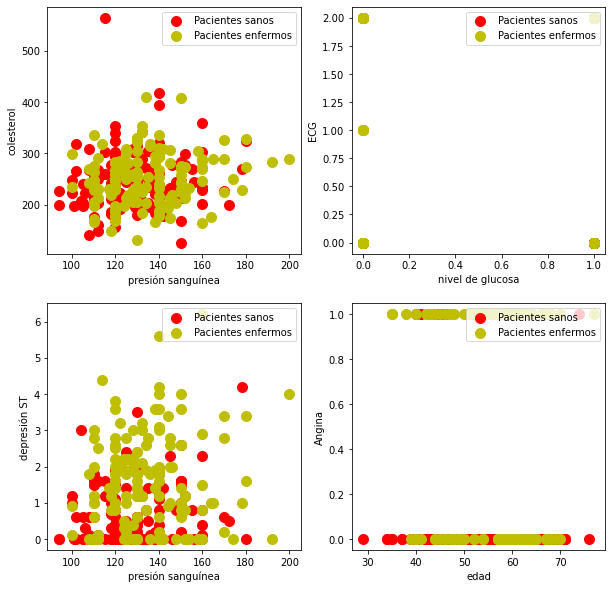

In [22]:
fig, axs = plt.subplots(2, 2,figsize=(10,10))

#El plot 1:
caracteristica_x = 3
caracteristica_y = 4
dibujarScatter(axs[0,0],caracteristica_x, caracteristica_y)

caracteristica_x = 5
caracteristica_y = 6
dibujarScatter(axs[0,1],caracteristica_x, caracteristica_y)

caracteristica_x = 3
caracteristica_y = 9
dibujarScatter(axs[1,0],caracteristica_x, caracteristica_y)

caracteristica_x = 0
caracteristica_y = 8
dibujarScatter(axs[1,1],caracteristica_x, caracteristica_y)

In [23]:
from mpl_toolkits.mplot3d import Axes3D


Plotteando: presión sanguínea(X) - colesterol(Y) - nivel de glucosa(Z)


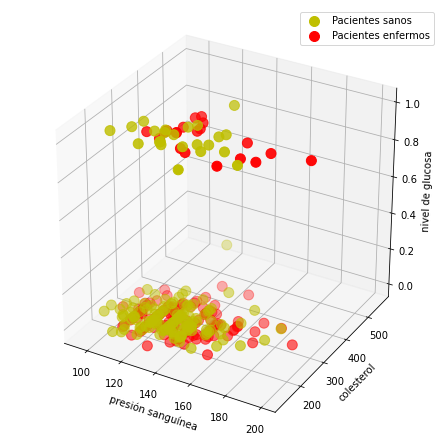

In [26]:
caracteristica_x = 3
caracteristica_y = 4
caracteristica_z = 5

fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)

columnas = dataframe_cardio.columns
print("Plotteando: "
      +columnas[caracteristica_x]+"(X) - "
      +columnas[caracteristica_y]+"(Y) - "
      +columnas[caracteristica_z]+"(Z)")

ax.scatter(pacientes_sanos[:,caracteristica_x],
           pacientes_sanos[:,caracteristica_y],
           pacientes_sanos[:,caracteristica_z],
          color='y', s=100, label='Pacientes sanos')

ax.scatter(pacientes_enfermos[:,caracteristica_x],
           pacientes_enfermos[:,caracteristica_y],
           pacientes_enfermos[:,caracteristica_z],
          color='r', s=100, label='Pacientes enfermos')

ax.set_xlabel(columnas[caracteristica_x])
ax.set_ylabel(columnas[caracteristica_y])
ax.set_zlabel(columnas[caracteristica_z])

plt.legend(loc='upper right')
plt.show()

Subplots en 3D

In [30]:
def plottear3D(plotArea, caracteristica_x, caracteristica_y, caracteristica_z):
    columnas = dataframe_cardio.columns
    print("Plotteando: "
          +columnas[caracteristica_x]+"(X) - "
          +columnas[caracteristica_y]+"(Y) - "
          +columnas[caracteristica_z]+"(Z)")

    plotArea.scatter(pacientes_sanos[:,caracteristica_x],
               pacientes_sanos[:,caracteristica_y],
               pacientes_sanos[:,caracteristica_z],
              color='y', s=100, label='Pacientes sanos')

    plotArea.scatter(pacientes_enfermos[:,caracteristica_x],
               pacientes_enfermos[:,caracteristica_y],
               pacientes_enfermos[:,caracteristica_z],
              color='r', s=100, label='Pacientes enfermos')

    plotArea.set_xlabel(columnas[caracteristica_x])
    plotArea.set_ylabel(columnas[caracteristica_y])
    plotArea.set_zlabel(columnas[caracteristica_z])

    plotArea.legend(loc='upper right')

Plotteando: presión sanguínea(X) - colesterol(Y) - nivel de glucosa(Z)
Plotteando: nivel de glucosa(X) - ECG(Y) - nivel de glucosa(Z)
Plotteando: Pulso(X) - Angina(Y) - nivel de glucosa(Z)
Plotteando: depresión ST(X) - curva ST(Y) - nivel de glucosa(Z)


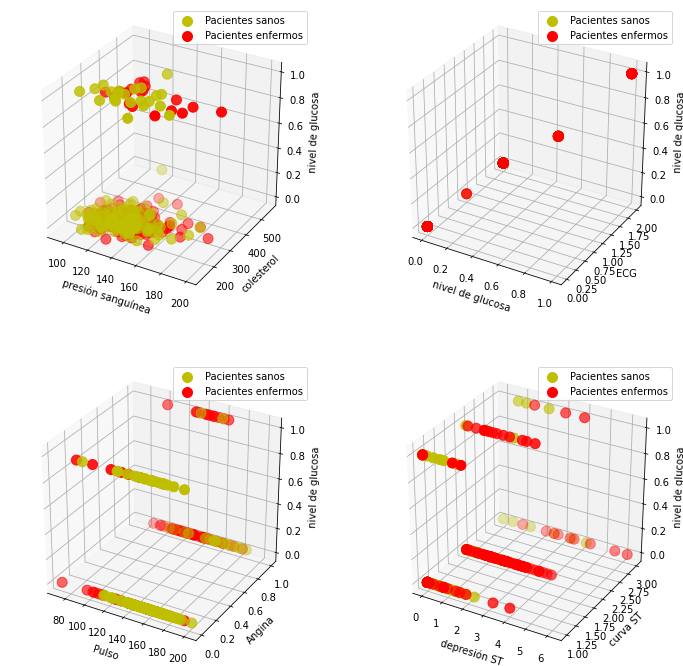

In [31]:
caracteristica_x = 3
caracteristica_y = 4
caracteristica_z = 5

fig = plt.figure(figsize = (12,12))
ax3D_1 = fig.add_subplot(2,2,1, projection='3d')
ax3D_2 = fig.add_subplot(2,2,2, projection='3d')
ax3D_3 = fig.add_subplot(2,2,3, projection='3d')
ax3D_4 = fig.add_subplot(2,2,4, projection='3d')

caracteristica_x = 3
caracteristica_y = 4
caracetristica_z = 5
plottear3D(ax3D_1, caracteristica_x, caracteristica_y, caracteristica_z)

caracteristica_x = 5
caracteristica_y = 6
caracetristica_z = 7
plottear3D(ax3D_2, caracteristica_x, caracteristica_y, caracteristica_z)

caracteristica_x = 7
caracteristica_y = 8
caracetristica_z = 9
plottear3D(ax3D_3, caracteristica_x, caracteristica_y, caracteristica_z)

caracteristica_x = 9
caracteristica_y = 10
caracetristica_z = 11
plottear3D(ax3D_4, caracteristica_x, caracteristica_y, caracteristica_z)